In [46]:

import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.shape

(4238, 16)

In [4]:
df.drop("education",axis=1,inplace=True)
df.head(2)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


In [5]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

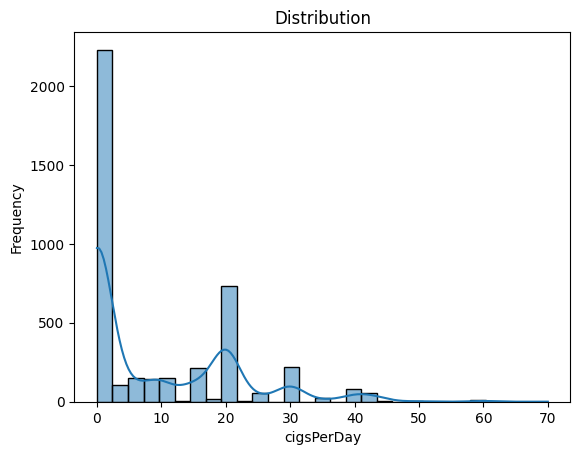

In [6]:
sns.histplot(df['cigsPerDay'], kde=True)
plt.xlabel('cigsPerDay')
plt.ylabel('Frequency')
plt.title('Distribution')
plt.show()

In [7]:
median_cigsPerDay = df['cigsPerDay'].median()
df['cigsPerDay'].fillna(value=median_cigsPerDay, inplace=True)
median_cigsPerDay

0.0

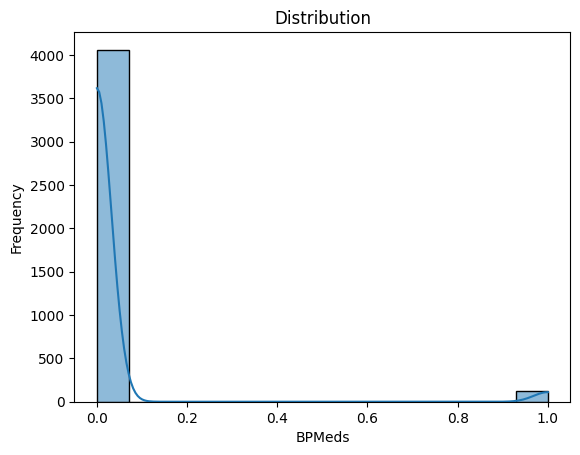

In [8]:
sns.histplot(df['BPMeds'], kde=True)
plt.title('Distribution')
plt.xlabel('BPMeds')
plt.ylabel('Frequency')
plt.show()

In [9]:
df['BPMeds'].fillna(0, inplace = True)

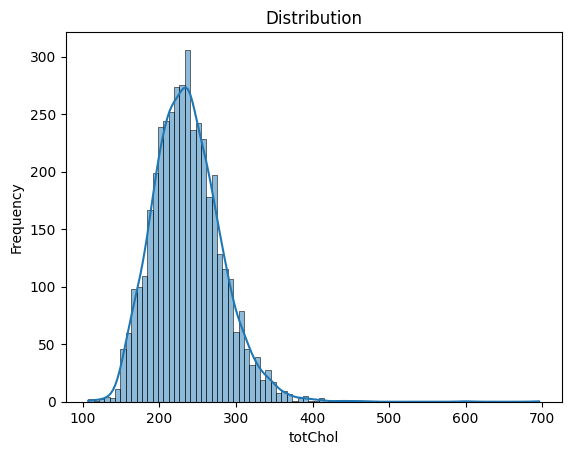

In [10]:
sns.histplot(df['totChol'], kde=True)
plt.title('Distribution')
plt.xlabel('totChol')
plt.ylabel('Frequency')
plt.show()

In [11]:
#Since normal distribution - use mean for null values
mean_totChol = df['totChol'].mean()
df['totChol'].fillna(value=mean_totChol, inplace=True)

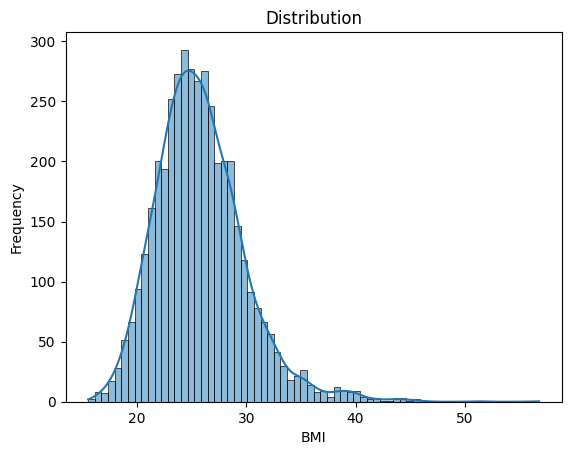

In [12]:
sns.histplot(df['BMI'], kde=True)
plt.title('Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [13]:
#Since normal distribution - use mean for null values
mean_BMI = df['BMI'].mean()
df['BMI'].fillna(value=mean_BMI, inplace=True)

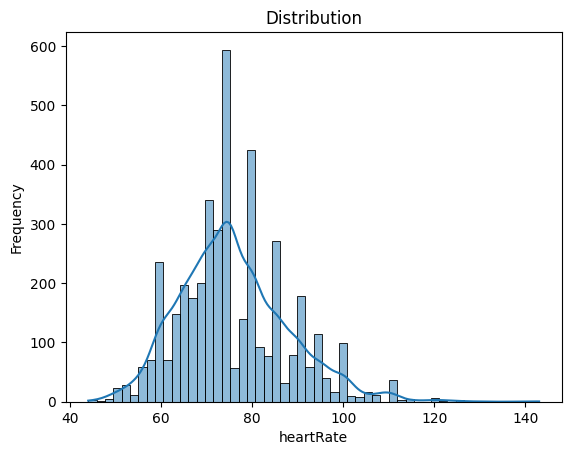

In [14]:
sns.histplot(df['heartRate'], kde=True)
plt.title('Distribution')
plt.xlabel('heartRate')
plt.ylabel('Frequency')
plt.show()

In [15]:
#Since normal distribution - use mean for null values
mean_heartRate = df['heartRate'].mean()
df['heartRate'].fillna(value=mean_heartRate, inplace=True)

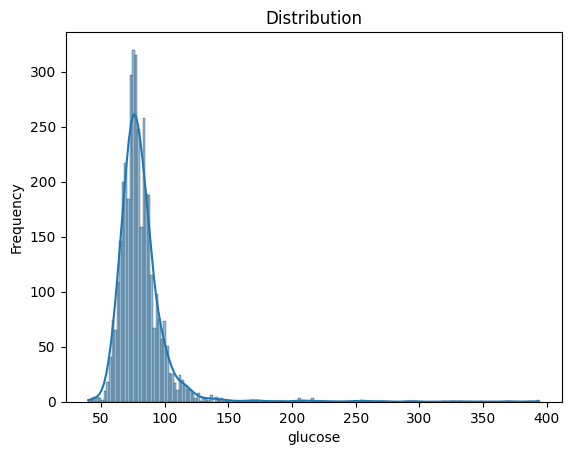

In [16]:
sns.histplot(df['glucose'], kde=True)
plt.title('Distribution')
plt.xlabel('glucose')
plt.ylabel('Frequency')
plt.show()

In [17]:
#Since normal distribution - use mean for null values
mean_glucose = df['glucose'].mean()
df['glucose'].fillna(value=mean_glucose, inplace=True)

In [18]:
correlation_matrix = df.corr()
correlation_matrix

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.197596,0.315630,-0.051545,-0.004546,0.005313,0.015708,-0.069974,-0.035989,0.057933,0.081506,-0.116601,0.005818,0.088428
age,-0.028979,1.000000,-0.213748,-0.191847,0.120955,0.057655,0.307194,0.101258,0.260270,0.394302,0.206104,0.135283,-0.012819,0.116850,0.225256
currentSmoker,0.197596,-0.213748,1.000000,0.760239,-0.048358,-0.032988,-0.103260,-0.044295,-0.046285,-0.130230,-0.107746,-0.167276,0.062348,-0.054157,0.019456
cigsPerDay,0.315630,-0.191847,0.760239,1.000000,-0.044675,-0.032244,-0.065046,-0.036150,-0.026816,-0.088375,-0.056687,-0.092332,0.073866,-0.056650,0.058859
BPMeds,-0.051545,0.120955,-0.048358,-0.044675,1.000000,0.114609,0.258697,0.051394,0.078712,0.251503,0.192356,0.099647,0.015139,0.048856,0.086417
prevalentStroke,-0.004546,0.057655,-0.032988,-0.032244,0.114609,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.024840,-0.017676,0.018055,0.061810
prevalentHyp,0.005313,0.307194,-0.103260,-0.065046,0.258697,0.074830,1.000000,0.077808,0.163041,0.696755,0.615751,0.300572,0.147222,0.082924,0.177603
diabetes,0.015708,0.101258,-0.044295,-0.036150,0.051394,0.006949,0.077808,1.000000,0.040092,0.111283,0.050329,0.086250,0.048993,0.605705,0.097317
totChol,-0.069974,0.260270,-0.046285,-0.026816,0.078712,0.000067,0.163041,0.040092,1.000000,0.207609,0.163903,0.114789,0.090676,0.044583,0.081624
sysBP,-0.035989,0.394302,-0.130230,-0.088375,0.251503,0.057009,0.696755,0.111283,0.207609,1.000000,0.784002,0.325247,0.182174,0.134608,0.216429


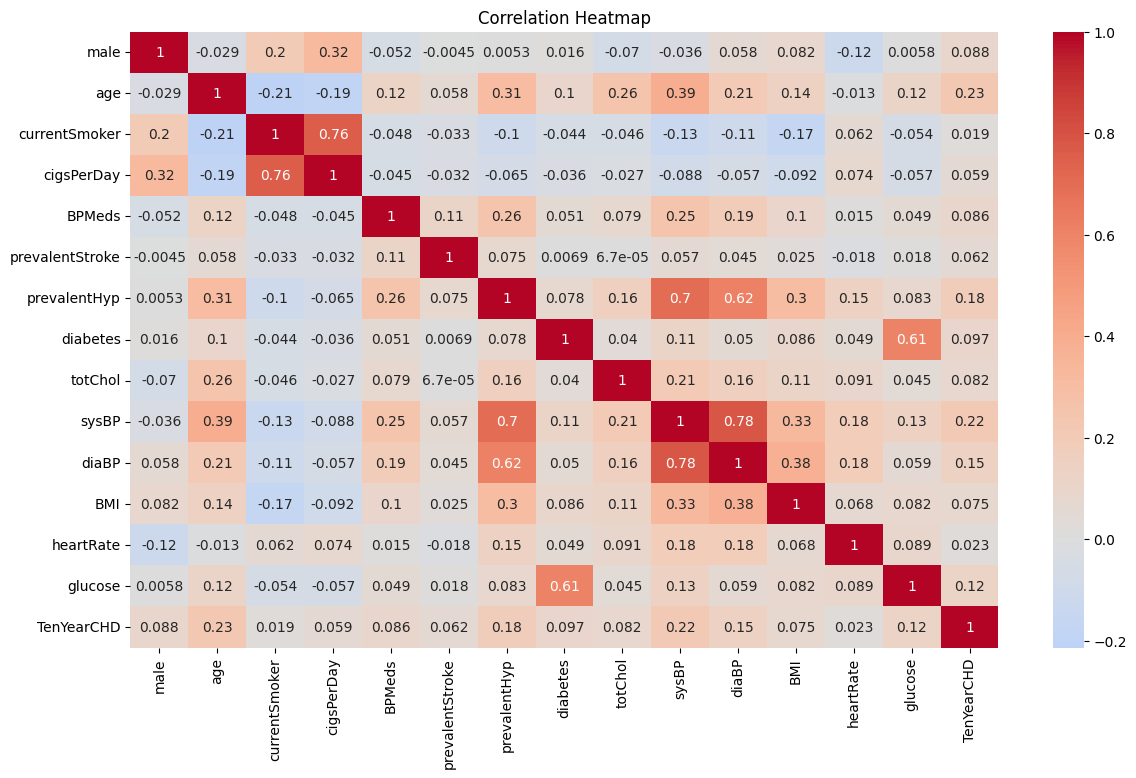

In [19]:
plt.figure(figsize=(14,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
df.drop(columns = 'currentSmoker', axis=1, inplace=True)

In [21]:
df['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

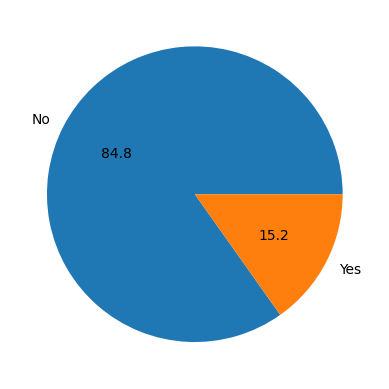

In [22]:
sizes = df['TenYearCHD'].value_counts(sort=1)
plt.pie(sizes, autopct='%1.1f', labels=['No', 'Yes'])
plt.show()

In [23]:
df.isnull().sum()

male               0
age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [55]:
X = df.drop(columns=['TenYearCHD'], axis=1)
Y = df['TenYearCHD']
x_train,x_test, y_train,y_test= train_test_split(X,Y,test_size=0.2)

scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)

model = LogisticRegression()
model.fit(x_train_scale, y_train)
predictions = model.predict(x_test_scale)
score = accuracy_score(predictions, y_test)
print(score)

0.839622641509434
